In [13]:

%pip install pandas scikit-learn seaborn matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

path = 'alzheimers_prediction_dataset.csv'
df = pd.read_csv(path)


In [15]:
X = df.drop(columns='Alzheimer’s Diagnosis')
y = df['Alzheimer’s Diagnosis']


numerical_cols = ['Age', 'BMI', 'Cognitive Test Score']
categorical_cols = [
    'Gender', 'Education Level', 'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
    'Diabetes', 'Hypertension', 'Cholesterol Level', 'Family History of Alzheimer’s', 
    'Depression Level', 'Sleep Quality', 'Dietary Habits', 'Air Pollution Exposure', 'Employment Status',
    'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level', 
    'Income Level', 'Stress Levels', 'Urban vs Rural Living'
]


numeric_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Accuracy: 0.7127280070000673

Confusion Matrix:
[[6905 1814]
 [2454 3684]]

Classification Report:
              precision    recall  f1-score   support

          No       0.74      0.79      0.76      8719
         Yes       0.67      0.60      0.63      6138

    accuracy                           0.71     14857
   macro avg       0.70      0.70      0.70     14857
weighted avg       0.71      0.71      0.71     14857



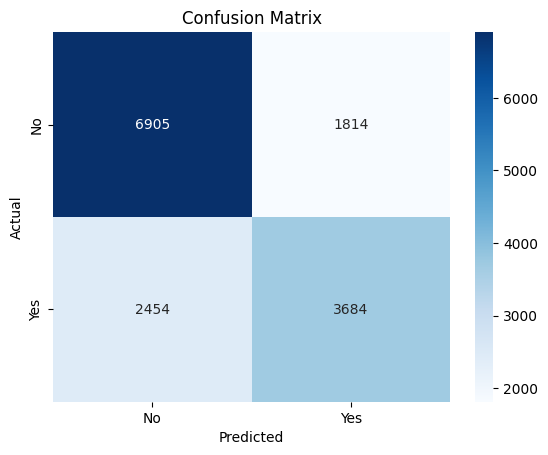

In [17]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()